<a href="https://colab.research.google.com/github/zaynpatel/SatSys/blob/main/SatSys_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SatSys Calculator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# All constants
Re    = 6378        # km
geo   = 35786       # km
c     = 299792458   # m/s
mu    = 398600      # km3/s2
G     = 6.67e-11    #
v_esc = 11.2        # escape velocity, km/s
k     = 1.38e-23    # Boltzmann constant (J/K)
k_dB  = -228.6      # Boltzmann constant in decibels (dB * J/K)

## Chapter 3: Orbit Types and Elements

In [ ]:
def semi_major_axis(ra, rp):
  """
  ra: radius to the apogee
  rp: radius to the parogee
  """
  # Add radius of earth to apogee and perigee radii
  ra += Re 
  rp += Re
  semi_major_axis = ((ra + rp) / 2)
  return semi_major_axis

In [ ]:
# TEST WORKS WITH TEXTBOOK ANSWER
testing = semi_major_axis(1500, 1000)
print(testing)

7628.0


In [ ]:
def eccentricity(ra, rp):
  """
  ra: radius to the apogee
  rp: radius to the parogee
  """
  eccentricity = (ra - rp) / (ra + rp)
  return eccentricity

In [ ]:
### TESTED WITH NUMBERS IN THE TEXTBOOK BUT WANT TO INCLUDE EARTH'S RADIUS IN COMPUTATION

testing = eccentricity(7878, 7378)
print(testing)

0.03277399056109072


## Chapter 4: Orbital Mechanics 2D

In [ ]:
# Gravitational force
def gravitational_force(m1, m2, r):
    """
    Calculate gravitational force between two bodies of matter
    m1: the mass of the first body (kg)
    m2: the mass of the second body (kg)
    r : distance between the two bodies (m)

    OUTPUT: force F in Newtons between the two bodies
    """
    F = G*m1*m2/(r**2)
    return F

In [ ]:
# Orbital period
def get_orbital_period(a):
    """
    Get the time required for a satellite to complete its orbit
    a: semimajor axis of the orbit
    """
    T = 2*np.pi * a**1.5 / np.sqrt(mu)

In [ ]:
def get_total_energy(a):
    """
    Get the energy of a satellite; energy is conserved, being exchanged
    between potential and kinetic, with the sum total being constant.
    a: semimajor axis of the orbit
    """
    return -mu / (2*a)

In [ ]:
def vis_viva(v, r):
    """
    Another way to express the total energy of an orbit
    v: velocity of satellite (m/s)
    r: altitude of satellite (m)
    """
    return (v**2 / 2) - (mu / r)

In [ ]:
def orbit_radius(a, e, theta):
    """
    The orbit equation. Find the altitude of of the satellite given its True Anomaly.
    a: semimajor axis (km)
    e: eccentricity (constant, no units)
    theta: True Anomaly (degrees) (angle between perigee and position of spacecraft)
    """
    return a * (1 - e**2) / (1 + e*np.cos(theta))

## Chapter 5: Hohmann Transfers

In [ ]:
def hohmann_calc(r0, rf, mu=mu, R=Re):
    """
    Calculates changes in velocity to get from one orbital radius to another.
    INPUTS:
    - r0    : radius of initial orbit (km)
    - rf    : radius of final orbit (km)
    - mu    : gravitational parameter (km3/s2), defaulted as that of Earth
    - R     : radius of planetary body (km), defaulted as that of Earth
    OUTPUTS:
    - v1    : change in velocity to leave initial orbit (km/s)
    - v2    : change in velocity to leave final orbit (km/s)
    - v_sum : sum of v1 and v2, reflecting change in velocity between two 
              orbits (km/s)
    - t     : time it takes for one initial orbit, transfer, and one final
              orbit (s)
    - T0    : initial orbital period (s)
    - Tf    : final orbital period (s)
    - Tt    : time to transfer from one orbit to the other (s)

    Outputs return as a list
    """
    # Add radius of Earth to get true altitudes of orbits
    alt0 = r0 + Re
    altf = rf + Re

    v1 = np.sqrt(2*mu*altf / (alt0*(alt0 + altf))) - np.sqrt(mu / alt0)
    v2 = np.sqrt(mu / altf) - np.sqrt(2*mu*alt0 / (altf*(alt0 + altf)))

    v_sum = v1 + v2

    # Calculate semimajor axes
    # For circular orbits, a = r; for transitionary orbits, they are the 
    # average of the two radii
    a_trans = semi_major_axis(alt0, altf)

    # Calculate periods
    #
    # Note the transitionary period is multiplied by 1/2 since it takes 1/2
    # the total transitionary period to get from the initial orbit to the final
    # orbit
    T0 = get_orbital_period(alt0)        # Initial period
    Tt = 0.5*get_orbital_period(a_trans) # Transitionary period
    Tf = get_orbital_period(altf)        # Final period

    # t as defined in docstring
    t = T0 + Tt + Tf

    # Return outputs
    return [v1, v2, v_sum, t, T0, Tf, Tt]

In [ ]:
# To get Hohmann transfer calculator for any planet, change values of mu and R
def hohmann_calc_sun(r0, rf):
    """
    Calculates changes in velocity to get from one orbital radius to another,
    specifically orbits on the Sun.
    """
    return hohmann_calc(r0, rf, mu=1.326e11, R=695000)

## Chapter 6: Time

In [ ]:
def julian_day(year, month, day):
  """
  julian_day is a function that takes in the three params needed to calculate a julian day and computs them. Julian days are valuable because they're a way to meausre time and synchronize with the roman calendar.
  year: calculation is bounded by years 1901 to 2099
  month: bounded from 1-12
  day: bounded from 1-31
  """
  julian_day = 367 * year - np.round(7*(year + np.round(month + 9)/12)/4) + np.round((275*month)/9) + day + 1721013.5
  return julian_day

In [ ]:
### CONFIRM WITH SOLUTION
def ut_zero(year, month, day, ut):
  # call functions with their params by placing params in the function you want to call a function on
  return (julian_day(year, month, day)) + (ut/24)

**Sidereal time definition:** Measured by the rotation of the Earth relative to the fixed stars. A day in sidereal time is 23 hrs, 56 min, 4 sec; 4 minutes shorter than a solar day.

In [ ]:
def local_sidereal_time(theta_g, angle):
  """
  theta_g: 0 hours of Greenwich meridan
  angle: required to be in range(0, 360)
  """
  return theta_g + angle

In [ ]:
def julian_day_number(year, month, day, UT=12):
  if month < 3:
    year -= 1
    month += 12
  A = np.floor(year / 100)
  B = 2 - A + np.floor(A / 4)
  JD = np.floor(365.25 * (year + 4716)) + np.floor(30.6001 * (month + 1)) + day + B - 1524.5 + UT / 24
  return JD

## Chapter 8: Link Design and Analysis

In [ ]:
# Linear-to-Decibel Calculator
def lin2decibel(lin):
    """
    Convert value from linear space to decibel space.
    lin: value in linear space
    """
    return 10*np.log10(lin)

In [ ]:
# Decibel-to-Linear Calculator
def dec2linear(dec):
    """
    Convert value from decibel space to linear space.
    dec: value is dB
    """
    return 10**(dec/10)

### Notes on Decibel Arithmetic

Addition in the logarithmic space is multiplication in the linear space. Assume you have three values $A$, $B$, and $C$.

$\log(A) + \log(B) + \log(C) = \log(A * B * C)$

Similarly, subtraction in logarithmic space is division in linear space.

$\log(A) - \log(B) = \log(\frac{A}{B})$

This is useful because it means that if you convert values from linear space into decibel units, you can just add these values together instead of multiplying them, which makes mathematical calculations much more simple.

## Chapter 9: Transmitter (Tx)

In [ ]:
# Helper function for converting frequency to wavelength
def freq2wave(frequency):
  return c / frequency

In [ ]:
def gain(effective_aperture_area, wavelength):
  """
  effective_aperture_area: ratio of received power to the power per unit area
  """
  return ((4*np.pi) / wavelength ** 2) * effective_aperture_area

In [ ]:
def gain_max(antenna_efficiency, diameter, wavelength):
  """
  The gain_max formula is used when there's a circular aperture versus gain which is used for isotropic antenna (* confirm *)
  antenna_efficiency: efficiency of antenna, defined by the effective aperture area of antenna divided by surface area of antenna (unitless)
  diameter: diameter of the antenna (m)
  wavelength: the speed of light divided by the frequency of the wave (m)
  """
  gain_max_formula = antenna_efficiency * ((np.pi * diameter) / wavelength) ** 2
  return gain_max_formula

In [ ]:
def three_dB_bandwidth(wavelength, diameter):
  """
  Compute 3 dB bandwidth, which comes out to the angle at which a 3 dB beam
  loses half its gain. This is useful for calculating pointing loss.

  INPUTS:
  - wavelength: the wavelength of the signal broadcasted
  - diameter: the diameter of the antenna
  """
  return 70 * (wavelength / diameter) # units are in dB

In [ ]:
def loss_pointing(pointing_acc, wavelength, diameter):
  """
  pointing_acc: the pointing accuracy of the antenna
  wavelength: the wavelength of the signal broadcasted
  diameter: the diameter of the antenna
  """
  return 12 * (pointing_acc / three_dB_bandwidth(wavelength, diameter)) ** 2

In [ ]:
def loss_polarization(angle_bt_rx_and_sig):
  """
  This function is useful when the receiving antenna (Rx) is not oriented with
  the same polarization as the transmitted wave. In other words, the electric
  field of the transmitted wave is not pointing in the same direction as the 
  receiving antenna, which can cause signal loss. We can use this 
  formula to identify polarization mismatch.
  angle_bt_rx_and_sig: the angle between the receiving antenna and the signal
  """
  polarization = -20*np.log10(np.cos(angle_bt_rx_and_sig))
  return polarization

Feeder loss $L_{Feeder}$ is the loss of a signal when it is being transmitted between a power amplifier and antenna. It is mostly due to power degradation as the signal moves through hardware. This value is assumed to be between 0.5 dB and 1.5 dB.

In [ ]:
def eirp_func(transmitter_gain, transmitter_power, pointing_acc, wavelength, diameter, polar_mismatch, feeder_loss):
  """
  Calculate the Effective Isotropic Radiated Power (EIRP) (measured in dBW),
  which is used as a performance metric of a transmitter. All inputs should be
  in dB.
  """
  return transmitter_gain + transmitter_power - loss_pointing(pointing_acc, wavelength, diameter) - loss_polarization(polar_mismatch) - feeder_loss

In [ ]:
### TESTED WITH NUMBERS IN TEXTBOOK

# EIRP of a 2.4 m gateway antenna with 57 dBi of gain, 1.5 dB of feeder loss, and 4 W of RF output?
# Note that wavelength can be any non-zero number in this instance, since there is no pointing loss assumed

eirp_func(transmitter_gain=57, transmitter_power=lin2decibel(4), pointing_acc=0, wavelength=10, diameter=2.4, polar_mismatch=0, feeder_loss=1.5)

61.520599913279625

In [ ]:
### TESTED WITH NUMBERS IN TEXTBOOK

# EIRP of a 0.5 m gateway antenna with 36 dBi of gain, 1 dB of feeder loss, and 0.6 W of RF output?

eirp_func(transmitter_gain=36, transmitter_power=lin2decibel(0.6), pointing_acc=0, wavelength=10, diameter=0.5, polar_mismatch=0, feeder_loss=1)

32.78151250383644

## Chapter 10: Propogation

In [ ]:
def fspl(alt, freq, dB=True):
  """
  alt: (float) altitude in meters
  freq: (float) frequency in Hz
  """
  loss = (4*np.pi*alt/(c/freq))**2
  if dB:
    return lin2decibel(loss)
  return loss

In [ ]:
fspl(geo*1000, 1.5e9) # L band

187.03786051908588

In [ ]:
fspl(geo*1000, 10e9) # Ku band

203.51603533797226

The function below is for calculating the linear distance between a transmitter/receiver and a satellite, given the height of the satellite above Earth and the elevation angle of the base station.

In [ ]:
# For finding the distance between a radio station and a satellite
def get_distance(alt, angle_elev):
  """
  Args:
  - alt: (int) altitude of the satellite from Earth (km)
  - angle_elev: (int) angle of radio pointed at satellite relative to surface of
                      Earth (radians)
  Returns:
  - Distance between radio station and satellite
  - All three angles in the path length triangle
    - Angle at base station
    - Angle at satellite
    - Angle at center of Earth
  - Other two sides of triangle:
    - Re
    - Re + h

  """
  # # calculate angle of radio direction to radius of Earth
  # theta = angle_elev + np.pi/2
  # # calculate angle between direction of radio to satellite and perpendicular height
  # # of satellite
  # beta = np.arcsin(Re*np.sin(theta)/(Re + alt))
  # Find angle between center of Earth to satellite and center of Earth to radio
  phi = np.pi/2 - angle_elev - np.arcsin(Re/(Re+alt) * np.cos(angle_elev))
  # Distance can be found with law of cosines
  d = np.sqrt(Re**2 + (Re + alt)**2 - 2*Re*(Re + alt)*np.cos(phi))
  return d#, (theta, beta, phi), (Re, Re + alt)

In [ ]:
def deg2rad(deg):
  rad = deg*np.pi/180
  return rad

In [ ]:
deg2rad(50)

0.8726646259971648

In [ ]:
### TESTING

# Given a satellite at an altitude of 500 km and an elevation angle of 50 deg,
# compute the path length
# Answer should be about 636.8 km

get_distance(500, deg2rad(50))

636.7901147416413

## Chapter 11: Receivers

In [ ]:
def received_power(Ptx, Gtx, A, R):
    """
    Computing the received power, or strength of the signal in front of receiver
    antenna.

    INPUTS:
    - Ptx: transmitter power (W)
    - Gtx: transmitter gain (unitless)
    - A  : surface area of the receiver antenna (m^2)
           can also be effective aperture if more applicable
    - R  : distance between Tx and Rx antennas (m)
    OUTPUTS:
    - Pr : received power (W)
    """
    return ((Ptx * Gtx)/(4*np.pi)) * (A / R**2)

In [ ]:
def eff_aperture_rx(Grx, wavelength):
    """
    Compute effective aperture of the Rx, can be used in above formula to find
    received power.

    INPUTS:
    - Grx: gain of receiver (unitless)
    - wavelength: wavelength of incoming signal (m)
    OUTPUTS:
    - A_eff: effective aperture (m^2)
    """
    return Grx / (4*np.pi / wavelength**2)

**Friis Equation**: This is a way of defining received power which includes defining it using losses at the transmitter and receiver. $L_{Tx}$ and $L_{Rx}$ are the feeder losses of the transmitting and receiving antennae.

$P_{Rx} = \left(\frac{P_{Tx}G_{Tx}G_{Rx}}{L_{Tx}L_{Rx}}\right)\left(\frac{\lambda}{4\pi R}\right)^2$

In [ ]:
def friis(Ptx, Gtx, Grx, Ltx, Lrx, frequency, distance):
    """
    Compute received power using different terms. This uses the Friis equation,
    defined above.

    INPUTS:
    - Ptx: transmitting power (W)
    - Gtx: transmitting gain (unitless)
    - Grx: receiving gain (unitless)
    - Ltx: feeder loss at transmitter (unitless) (may be expressed in dB)
    - Lrx: feeder loss at receiver (unitless) (may be expressed in dB)
    - frequency: frequency of the incoming signal (Hz)
    - distance: distance between transmitter and receiver (m)
    OUTPUTS:
    - Prx: receiving power (W)
    """
    # Compute FSPL
    loss = fspl(distance, frequency)
    # Find "left fraction"
    gains_on_losses = (Ptx * Gtx * Grx) / (Ltx * Lrx)

    return gains_on_losses / loss

**Example problem!**

Consider the transmission from an Earth Station (ES) to a geostationary (GEO) satellite at Ka-band (27.5 GHz).
1. What is the receive gain, $G_{Rx}$, of a system with a 3 dB beamwidth of 2 degrees and an efficiency of 0.55?



In [ ]:
# First, compute wavelength for signals at Ka-band
ka_wave = freq2wave(27.5e9)

# We can then calculate diameter of signal since we know the 3 dB beamwidth
# 3dB = 70 * (wavelength / distance)
diam = 70 * (ka_wave / 2)

# Calculate gain
Grx = gain_max(0.55, diam, ka_wave)
lin2decibel(Grx) # gain in dB

38.22798523583063

2. If the EIRP of the Tx is 60 dBW, what is the receiving power at the GEO satellite?

In [ ]:
# EIRP accounts for Ptx, Gtx, Ltx, and Lrx, so we can set one of these variables
# as EIRP in the Friis function and the rest to one
eirp = dec2linear(60)

# Altitude of GEO satellite is defined as constant
geo_alt = geo # 35786 km

# Calculate Prx using Friis Equation
Prx = friis(eirp, 1, Grx, 1, 1, 27.5e9, geo_alt)
lin2decibel(Prx) # dBW

76.4009095182456

### G/T

In [ ]:
def g_on_t(Grx, Tsys):
    """
    G on T, or Gain Over Temperature, is a metric for measuring the performance
    of a receiver, just like EIRP is a metric for measuring performance of a
    transmitter.

    INPUTS:
    - Grx: receiver gain (unitless)
    - Tsys: system noise temperature (K)
    """
    return Grx / Tsys

### System Noise Temperature ($T_{sys}$)

There are two ways to calculate the system noise temperature: you can compute it at the output of the receiving antenna before a signal is affected by feeder loss ($T_1$), or you can compute it at the input to the receiver itself after it has been affected by feeder loss ($T_2$). Both functions below compute these two noise temperatures.

In [ ]:
def get_tsys1(Ta, Tf, Teff, Lf, Grx):
    """
    Compute the system noise temperature assuming it to be taken before
    feeder loss takes effect.

    INPUTS:
    - Ta  : antenna noise temperature (see below)
    - Tf  : feeder operating temperature
    - Teff: low noise amplifier (LNA) effective temperature
    - Lf  : feeder loss
    - Grx : receiver gain
    """
    return Ta + (Lf - 1)*Tf + (Teff / Grx)

In [ ]:
def get_tsys2(Ta, Tf, Teff, Lf):
    """
    Compute the system noise temperature assuming it to be taken after
    feeder loss takes effect.

    INPUTS:
    - Ta  : antenna noise temperature (see below)
    - Tf  : feeder operating temperature
    - Teff: low noise amplifier (LNA) effective temperature
    - Lf  : feeder loss
    """
    return Ta/Lf + Tf*(1 - 1/Lf) + Teff

In [ ]:
def antenna_temp(Tsky, Tgnd):
    """
    Compute antenna noise temperature.

    INPUTS:
    - Tsky : sky temperature (K)
    - Tgnd : ground temperature (K)
    """
    return Tsky + Tgnd

In [ ]:
def amplifier_temp(NF, Teff=0):
    """
    Compute the amplifier noise temperature.

    INPUTS:
    - Teff : effective noise temperature
    - NF   : LNA noise figure (dB)
    """
    # Define standard reference noise temperature (K)
    To = 290

    # If Teff is still default, calculate it; otherwise, set it equal to Teff
    if Teff:
        return Teff
    return To*(dec2linear(NF) - 1)

## Chapter 12: Performance Parameters



In [ ]:
# Carrier to noise power ratio
def c_to_n(eirp, space_loss, atm_loss, g_on_t, bandwidth):
    """
    Compute carrier-to-noise ratio.

    INPUTS:
    - eirp       : EIRP (dBW)
    - space_loss : loss through space, FSPL (dB)
    - atm_loss   : loss through the atmosphere (dB)
    - g_on_t     : receiver gain over system noise temperature (dB)
    - bandwidth  : frequency range of the part of spectrum where signals are
                   being transmitted (Hz)
    """
    return eirp + space_loss + atm_loss + g_on_t - k_dB - lin2decibel(bandwidth)

In [ ]:
# Carrier to noise power ratio
def c_to_n0(eirp, space_loss, atm_loss, g_on_t):
    """
    Compute carrier-to-noise ratio referenced to 1 Hz.

    INPUTS:
    - eirp       : EIRP (dBW)
    - space_loss : loss through space, FSPL (dB)
    - atm_loss   : loss through the atmosphere (dB)
    - g_on_t     : receiver gain over system noise temperature (dB)
    """
    return eirp + space_loss + atm_loss + g_on_t - k_dB

In [ ]:
def eb_no(eirp, space_loss, atm_loss, g_on_t, R):
    """
    Compute the energy per bit to noise spectral density ratio, Eb/No.
    The C/N metric can be calculated by:
              C/N = Eb/No + R - B

    INPUTS:
    - eirp       : EIRP (dBW)
    - space_loss : loss through space, FSPL (dB)
    - atm_loss   : loss through the atmosphere (dB)
    - g_on_t     : receiver gain over system noise temperature (dB)
    - R          : distance between transmitter and receiver (dBi)
    """
    return eirp + space_loss + atm_loss + g_on_t - k_dB - R

In [ ]:
### TESTING: Calculate EIRP, C/N, and C/No for the following:

Gtx = 28.5 # dBi
Ptx = lin2decibel(1) # dBW
Ltx = 1.4 # dB
g_on_t = -4.95 # dB/K
L_atm = 1.5 # dB
f = 14.25e9 # Hz
B = 1.625e6 # Hz

eirp = eirp_func(Gtx, Ptx, 0, c/f, 3, 0, Ltx)
FSPL = lin2decibel(fspl(geo*1000, f))
C_No = c_to_n0(eirp, -FSPL, -L_atm, g_on_t)
C_N = c_to_n(eirp, -FSPL, -L_atm, g_on_t, B)
C_N

163.99032435412948

In [ ]:
# Calculate data rate
def get_data_rate(c_to_n, bandwidth):
    """
    Calculate the data rate. 

    INPUTS:
    - c_to_n: the carrier-to-noise ratio (dB)
    - bandwidth: the bandwidth frequency (Hz)
    """
    return B*np.log2(1 + c_to_n)

## Workspace



### Exercise 10.5

In [ ]:
def fspl_vs_ang(alt: int, freq: int) -> None:    
    # Get linear space of angles
    angles = np.linspace(0, 90, 100)
    # Calculate path lengths given range of elevation angles at 1000 km
    dists = get_distance(alt, deg2rad(angles))
    # Compute free space path loss 
    losses = fspl(dists*1000, freq)

    # Plotting FSPLs against elevation angles
    plt.plot(angles, losses)
    plt.xlabel('Elevation angles (deg)'); plt.ylabel('Free space path loss (dB)')
    plt.title('Free space path loss vs. elevation angle @ 12 GHz and 1000 km')

    plt.savefig('fspl_vs_ang.png')

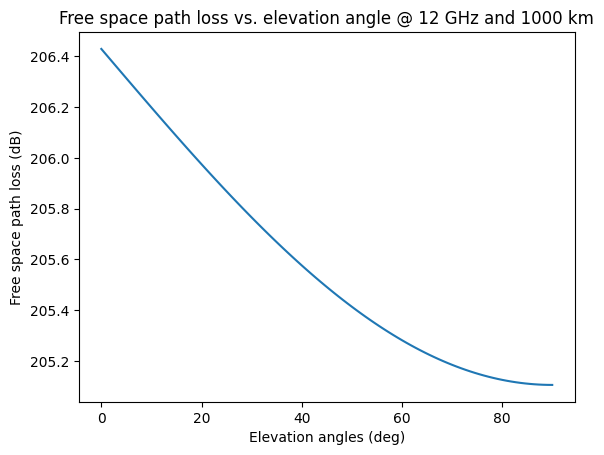

In [ ]:
fspl_vs_ang(geo, 12e9)

### Exercise 12.6

In [ ]:
# Exercise 12.6

dist = get_distance(1000, deg2rad(65))
loss = fspl(dist*1000, 40e9)
Gtx = lin2decibel(gain_max(.65, 2.4, freq2wave(40e9)))
Grx = lin2decibel(gain_max(.65, 1.5, freq2wave(40e9)))
Prx = lin2decibel(200) + Gtx + Grx - loss
Prx

-49.933922749561475